#### Dice roll comparison
- Simulate a fair die and a biased 6-sided die. The biased die has probabilities {0.15, 0.15, 0.15, 0.15, 0.15, 0.25}.

- Visualization that compares outcomes of multiple rolls of a fair die and this biased die. 

In [1]:
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### 'simulations' function definition:
This function simulates the Fair die and Biased die simultaneously for the user inputed times.
<br> Following that it stores the results into two lists and returns the two lists. 

In [2]:
def simulations (n):
    number = n;
    i = 0;
    fair_outputs = []
    biased_outputs = []
    req_list = []
    while (i!=number):
        # Biased die has the required probabilities set here
        biased_die = int(np.random.choice(np.arange(1, 7), p=[0.15,0.15,0.15,0.15,0.15,0.25]))
        
        # Fair Die has equal probabilities for each of its output
        fair_die = np.random.choice(np.arange(1, 7))
        
        # Appending each of the result to its list 
        biased_outputs.append(biased_die);
        fair_outputs.append(fair_die);
            
        i+=1;
    return (fair_outputs, biased_outputs)       

### 'label' function definition:
This function takes a plot as an argument and computes the label that has to be displayed<br> on each bar of the plot.

In [3]:
def label (plot):
    for rect in plot.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
            # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

            # Create annotation
        plot.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                            # positive and negative values.
    plt.show()
    

#### Input the number of simulations that you want

In [4]:
n = input("Enter the number of simulations of the biased die and fair die:")

Enter the number of simulations of the biased die and fair die:1000


In [5]:
# Function Call to compute the simulations
fair, biased = simulations(int (n))

In [6]:
# Here I have stored both the fair die and baised die results to a 
# dataframe for easy plotting purposes
req_result = pd.DataFrame()
req_result['fair']=fair
req_result['biased']=biased

### Plot 1: 
This plot shows how the fair die has performed.

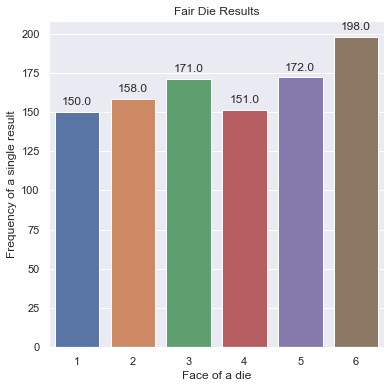

In [7]:
sns.set(rc={'figure.figsize':(6,6)})
plot = sns.countplot(x='fair', data = req_result)
plot.set_title('Fair Die Results')
plot.set_xlabel('Face of a die')
plot.set_ylabel('Frequency of a single result')
label(plot)

### Plot 2: 
This plot shows how the biased die has performed.

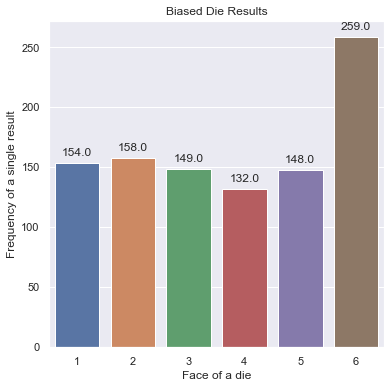

In [8]:
plot = sns.countplot(x='biased', data = req_result)
plot.set_title('Biased Die Results')
plot.set_xlabel('Face of a die')
plot.set_ylabel('Frequency of a single result')
label(plot)

### Plot 3: 
This plot is a comparision between fair die and biased die results

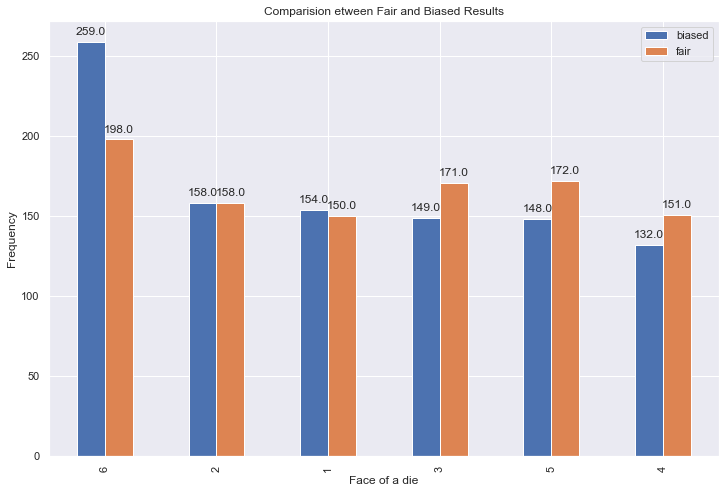

In [9]:
graph_df = req_result['biased'].value_counts().to_frame().join(req_result['fair'].value_counts().to_frame())
plot = graph_df.plot(kind='bar',figsize=(12, 8))
plot.set_title('Comparision etween Fair and Biased Results')
plot.set_xlabel('Face of a die')
plot.set_ylabel('Frequency')
label(plot)

### <font color = 'red'> Note: 

#### <font color='red'>The above plot has Face of a die on X axis. It is not in order (i.e., 1,2,3..). <br><br>The order of it is according to the decreasing order of frequencies of biased die results

